In [2]:
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [3]:
transects=gpd.read_file('Represas_depth_GPS.shp')
darro = transects.loc[transects['Nome']=='Darro_R1']
cascavel = transects.loc[transects['Nome']=='Cascavel_R3']

In [14]:
darro_length = darro.loc[(darro['GPS_Num']>=519) & (darro['GPS_Num']<=554)]
darro_length['dist'] = darro_length.geometry.distance(darro_length.iloc[0].geometry)

cascavel_length = cascavel.loc[(cascavel['GPS_Num']>=447) & (cascavel['GPS_Num']<=471)]
cascavel_length['dist'] = cascavel_length.geometry.distance(cascavel_length.iloc[0].geometry)
#darro_length['depth_smooth'] = darro_length['Depth_best'].ewm(alpha=0.9).mean()
#darro_length['depth_smooth'] = darro_length['depth_smooth'].rolling(window=7, center=False, min_periods=1).median()
#darro_length['depth_smooth_b'] = darro_length['depth_smooth'].rolling(window=10, center=False, min_periods=1).mean()
#darro_length['depth_smooth_b'] = darro_length['depth_smooth_b'].rolling(window=5, center=False, min_periods=1).min()
#darro_length['depth_avg'] = np.nanmean([darro_length['Depth_best'], darro_length['depth_smooth'], darro_length['depth_smooth_b']], axis=0)
#darro_length['depth_avg_smooth'] = darro_length['depth_avg'].rolling(window=5, center=False, min_periods=1).min()
#darro_length['depth_avg_smooth'] = darro_length['depth_avg_smooth'].rolling(window=5, center=False, min_periods=1).min()
#darro_length['depth_avg_smooth'] = darro_length['depth_avg_smooth'].rolling(window=5, center=False, min_periods=1).mean()

/home/amullen/anaconda3/envs/lake_modeling/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/amullen/anaconda3/envs/lake_modeling/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [5]:
darro_length['dist'].max()

670.1522292507226

In [15]:
cascavel_length['dist'].max()

156.95232174718498

In [40]:
#darro
morphometery_dist = np.array([0, 100, 200, 335, 400, 500, 600, 670])
morphometry_dist_reflect = morphometery_dist-670/2
morphometery_depth = np.array([-.5, -3, -4, -4.8, -4.5, -3.3, -1.5, -0.5])

model = np.poly1d(np.polyfit(morphometry_dist_reflect, morphometery_depth, 2)) 

dist_steps = np.arange(start=40, stop = 670/2+5, step=5)
step_depths = model(dist_steps)

#cascavel

morphometery_dist_casc = np.array([0, 25, 50, 75, 100, 125, 157])
morphometery_dist_casc_reflect = morphometery_dist_casc-157/2
morphometery_depth_casc = np.array([-.4, -1.5, -1.8, -1.9, -1.8, -1.5, -.4])

model = np.poly1d(np.polyfit(morphometery_dist_casc_reflect, morphometery_depth_casc, 2)) 

dist_steps_casc = np.arange(start=0, stop = 157/2+5, step=5)
step_depths_casc = model(dist_steps_casc)

<Axes: >

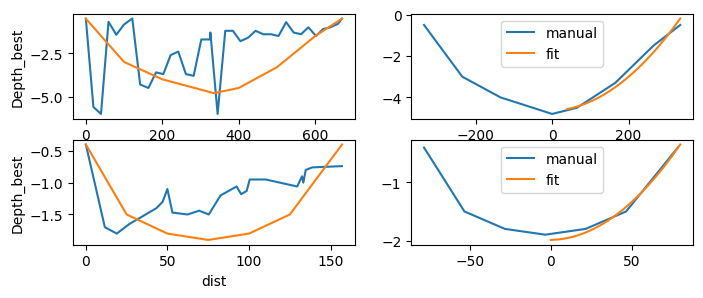

In [41]:
fig, axes=plt.subplots(2,2, figsize=(8,3))
sns.lineplot(data=darro_length, x='dist', y='Depth_best', ax=axes[0,0])
sns.lineplot(x=morphometery_dist, y=morphometery_depth, ax=axes[0,0])

sns.lineplot(x=morphometry_dist_reflect, y=morphometery_depth, ax=axes[0,1], label='manual')
sns.lineplot(x=dist_steps, y=step_depths, ax=axes[0,1], label='fit')

sns.lineplot(data=cascavel_length, x='dist', y='Depth_best', ax=axes[1,0])
sns.lineplot(x=morphometery_dist_casc, y=morphometery_depth_casc, ax=axes[1,0])

sns.lineplot(x=morphometery_dist_casc_reflect, y=morphometery_depth_casc, ax=axes[1,1], label='manual')
sns.lineplot(x=dist_steps_casc, y=step_depths_casc, ax=axes[1,1], label='fit')


In [43]:
ellipses = [tuple(elipse) for elipse in np.transpose([dist_steps, (dist_steps)/8.7, step_depths])]

ellipses_casc = [tuple(elipse) for elipse in np.transpose([dist_steps_casc, (dist_steps_casc)/7, step_depths_casc])]

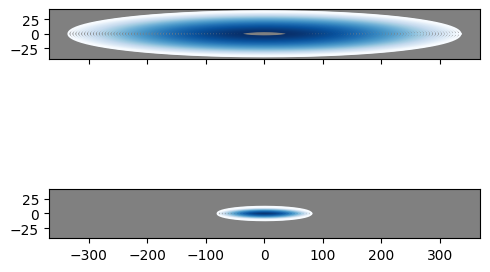

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

depths = [d for _, _, d in ellipses]  # Extract depth values
cmap = cm.Blues_r  # Choose a colormap
norm = plt.Normalize(min(depths), max(depths))  # Normalize depth values for colormap

depths_casc = [d for _, _, d in ellipses_casc]  # Extract depth values
cmap = cm.Blues_r  # Choose a colormap
norm_casc = plt.Normalize(min(depths_casc), max(depths_casc))  # Normalize depth values for colormap

t = np.linspace(0, 2 * np.pi, 300)  # Parameter range

fig, axes = plt.subplots(2,1,figsize=(5, 5), sharex=True, sharey=True)

# Plot each ellipse
for a, b, depth in ellipses:
    x = a * np.cos(t)
    y = b * np.sin(t)
    axes[0].plot(x, y, color=cmap(norm(depth)))

# Plot each ellipse
for a, b, depth in ellipses_casc:
    x = a * np.cos(t)
    y = b * np.sin(t)
    axes[1].plot(x, y, color=cmap(norm_casc(depth)))

for ax in axes.flat:
    ax.set_aspect('equal') 
axes[0].set_facecolor('gray')
axes[1].set_facecolor('gray')

fig.tight_layout()

In [10]:
import numpy as np

# Calculate and print areas
for i, (a, b, depth) in enumerate(ellipses[::-1]):
    area = np.pi * a * b
    if i%5==0:
        print(f"{depth*-1:.2f} {area:.2f}")


0.19 40524.74
0.81 34701.96
1.39 29330.56
1.92 24410.54
2.40 19941.89
2.84 15924.62
3.23 12358.74
3.57 9244.23
3.87 6581.09
4.12 4369.34
4.32 2608.97
4.47 1299.97


In [68]:
import numpy as np

# Calculate and print areas
for i, (a, b, depth) in enumerate(ellipses_casc[::-1]):
    area = np.pi * a * b
    if i%2==0:
        print(f"{depth*-1:.2f} {area:.2f}")

0.35 2872.31
0.73 2199.11
1.06 1615.68
1.34 1122.00
1.57 718.08
1.75 403.92
1.88 179.52
1.96 44.88
1.99 0.00


In [11]:
elipses = dist_steps